# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import skimage.io as io

# Load annotations from COCO dataset

In [4]:
dataDir = './coco/'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.63s)
creating index...
index created!


# Get'person' category ID and get image ID with 'person' category

In [5]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)
imgIds = imgIds[:10]
print(imgIds)

[532481, 458755, 385029, 311303, 393226, 532493, 8211, 327701, 188439, 434204]


In [6]:
selected_imgIds = []
for imgId in imgIds:
    annIds = coco.getAnnIds(imgIds=imgId, catIds=catIds, iscrowd=None)
    if annIds: 
        selected_imgIds.append(imgId)
    if len(selected_imgIds) >= 10:
        break


# Load and show the first 10 images

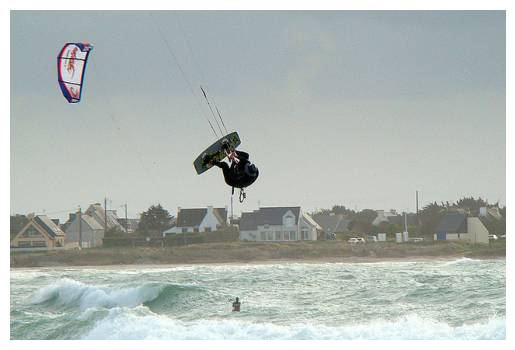

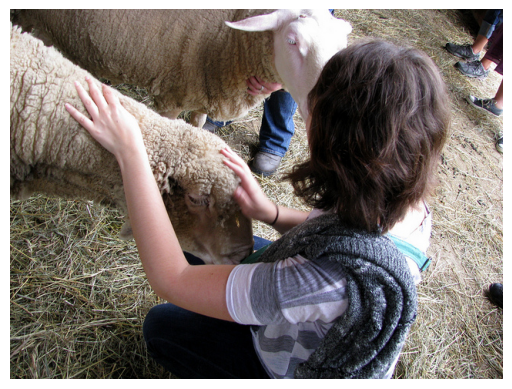

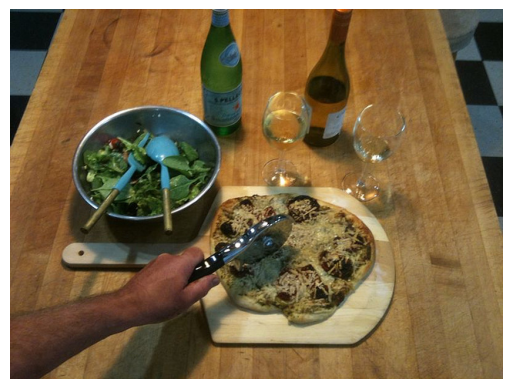

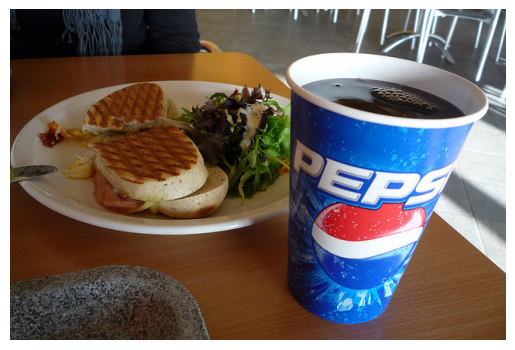

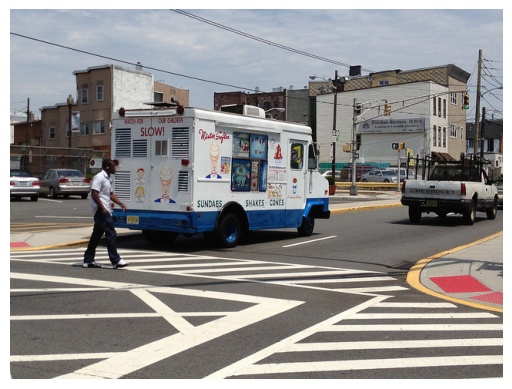

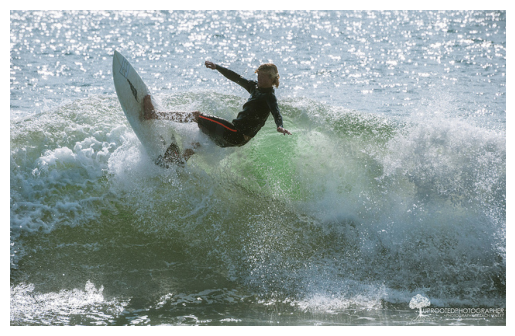

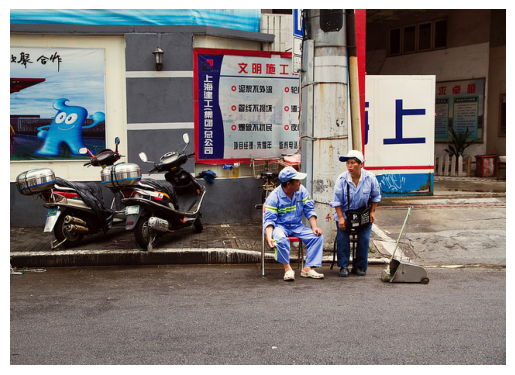

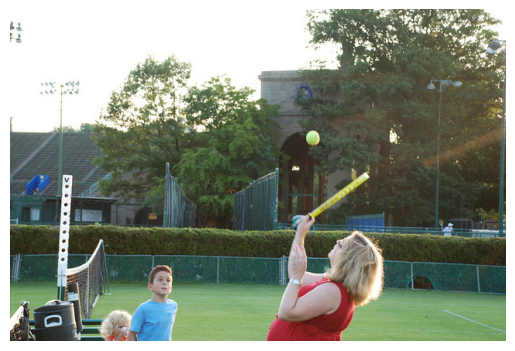

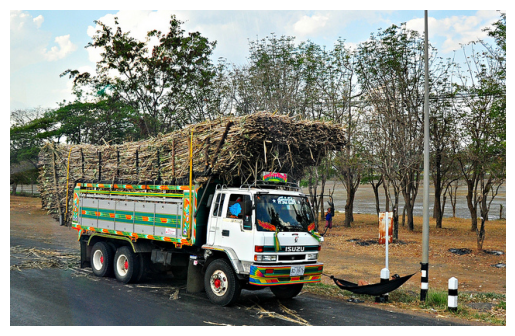

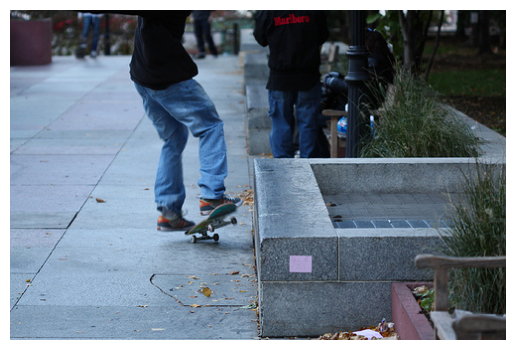

In [11]:
for imgId in selected_imgIds:
    img = coco.loadImgs(imgId)[0]
    I = io.imread(img['coco_url'])
    plt.imshow(I)
    plt.axis('off')
    plt.show()
    # Obtendo anotações de keypoints para a imagem
    annIds_kps = coco.getAnnIds(imgIds=imgId, catIds=catIds, iscrowd=None)
    anns_kps = coco.loadAnns(annIds_kps)
    print(ann_kps)


# Get keypoints coordenates

In [12]:
for ann_kps in anns_kps:
        keypoints = ann_kps['keypoints']
        keypoints = np.array(keypoints).reshape(-1, 3)  # Convertendo para uma matriz 3xN
        x = keypoints[:, 0]
        y = keypoints[:, 1]
        visibility = keypoints[:, 2]
    
        print("Coordenadas dos keypoints:")
        for i in range(len(x)):
            print("Keypoint {}: ({}, {})".format(i+1, x[i], y[i]))

        # Exibindo keypoints na imagem
        plt.imshow(I)
        plt.scatter(x, y, s=50, c='red', marker='o')
        plt.axis('off')
        plt.show()

KeyError: 'keypoints'